# Prerequisites & Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('sampledata/Mall_Customers.csv')
df['Gender'] = df.Genre
df = df.drop(['Genre'], axis=1)
df.head(2)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender
0,1,19,15,39,Male
1,2,21,15,81,Male


# Data Distributions

In [3]:
df.groupby(['Age', 'Gender']).size()

Age  Gender
18   Female    1
     Male      3
19   Female    2
     Male      6
20   Female    2
              ..
67   Male      3
68   Female    2
     Male      1
69   Male      1
70   Male      2
Length: 87, dtype: int64

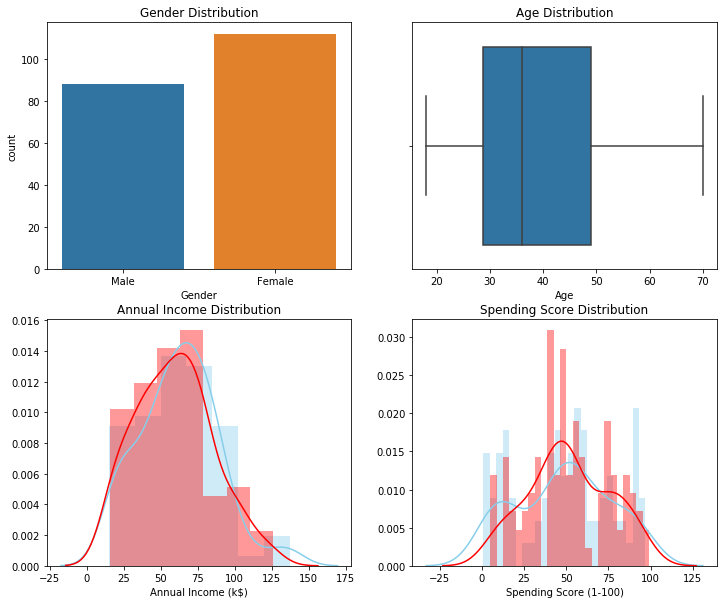

In [4]:
fig,axes = plt.subplots(2,2)
fig.set_size_inches(12,10)

sns.countplot(df.Gender, ax = axes[0,0]).set_title('Gender Distribution')
sns.boxplot(df.Age, ax = axes[0,1]).set_title('Age Distribution')
sns.distplot(df[df.Gender=='Male']['Annual Income (k$)'], color='skyblue', bins=7, ax = axes[1,0]).set_title('Annual Income Distribution')
sns.distplot(df[df.Gender=='Female']['Annual Income (k$)'], color='red', bins=7, ax = axes[1,0])
sns.distplot(df[df.Gender=='Male']['Spending Score (1-100)'], color='skyblue', bins=25, ax = axes[1,1]).set_title('Spending Score Distribution')
sns.distplot(df[df.Gender=='Female']['Spending Score (1-100)'], color='red', bins=25, ax = axes[1,1])

plt.show()

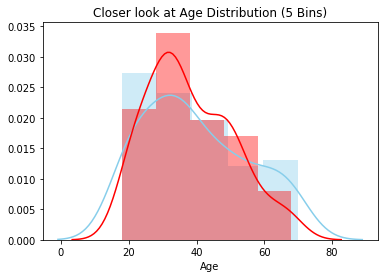

In [5]:
sns.distplot(df[df.Gender=='Male'].Age, color='skyblue', bins=5).set_title('Closer look at Age Distribution (5 Bins)')
sns.distplot(df[df.Gender=='Female'].Age, color='red', bins=5)
plt.show()

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df[df.Gender=='Female'].shape[0]/df.shape[0]

0.56

About the data:
* 56% of our customer demographics are female
* 30-40 Age Group has the majority, with 20-30 age group following after
* 50-70 Annual Income Group has the majority
* I wanted to separate the plots by Gender, just to make sure that they have similar trends and distributions. All aspects show that they have similar trends

In [53]:
from sklearn.cluster import KMeans

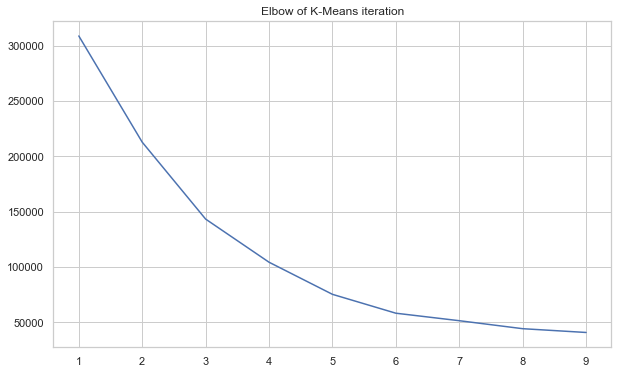

In [70]:
n = 10
df_K = df.copy()
df_K['isMale'] = [True if (i == 'Male') else False for i in df_K.Gender]
df_K = df_K.drop(['CustomerID','Gender'], axis=1)


res = []
for k in range(1,n):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    clusters = kmeans.fit(df_K)
    res.append(clusters.inertia_)
    
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.lineplot(range(1,n), res).set_title("Elbow of K-Means iteration")
plt.show()

In [71]:
def _scale_data(data, ranges):
    (x1, x2) = ranges[0]
    d = data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]

class RadarChart():
    def __init__(self, fig, location, sizes, variables, ranges, n_ordinate_levels = 6):

        angles = np.arange(0, 360, 360./len(variables))

        ix, iy = location[:] ; size_x, size_y = sizes[:]
        
        axes = [fig.add_axes([ix, iy, size_x, size_y], polar = True, 
        label = "axes{}".format(i)) for i in range(len(variables))]

        _, text = axes[0].set_thetagrids(angles, labels = variables)
        
        for txt, angle in zip(text, angles):
            if angle > -1 and angle < 181:
                txt.set_rotation(angle - 90)
            else:
                txt.set_rotation(angle - 270)
        
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid("off")
        
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i],num = n_ordinate_levels)
            grid_label = [""]+["{:.0f}".format(x) for x in grid[1:-1]]
            ax.set_rgrids(grid, labels = grid_label, angle = angles[i])
            ax.set_ylim(*ranges[i])
        
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
                
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)
        
    def title(self, title, *args, **kw):
        self.ax.text(0.9, 1, title, transform = self.ax.transAxes, *args, **kw)

In [72]:
df_K.head(1)

,Age,Annual Income (k$),Spending Score (1-100),isMale
0,19,15,39,True


In [73]:
clusters = KMeans(n_clusters=3).fit_predict(df_K)
df_K['label'] = clusters

# fig,axes = plt.subplots(1,3)
# fig.set_size_inches(15,6)

# attributes = list(df_K)
# n_groups = 3; n_cols = len(attributes)
# i_rows = n_groups//n_cols

# for i in range(3):
#     ix = i%3; iy = i_rows

plt.show()

In [74]:
df_K.head()

,Age,Annual Income (k$),Spending Score (1-100),isMale,label
0,19,15,39,True,1
1,21,15,81,True,1
2,20,16,6,False,1
3,23,16,77,False,1
4,31,17,40,False,1


In [75]:
df_K.describe()

,Age,Annual Income (k$),Spending Score (1-100),label
count,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000,1.005000
std,13.969007,26.264721,25.823522,0.622021
min,18.000000,15.000000,1.000000,0.000000
25%,28.750000,41.500000,34.750000,1.000000
50%,36.000000,61.500000,50.000000,1.000000
75%,49.000000,78.000000,73.000000,1.000000
max,70.000000,137.000000,99.000000,2.000000


In [50]:
from mpl_toolkits.mplot3d import Axes3D

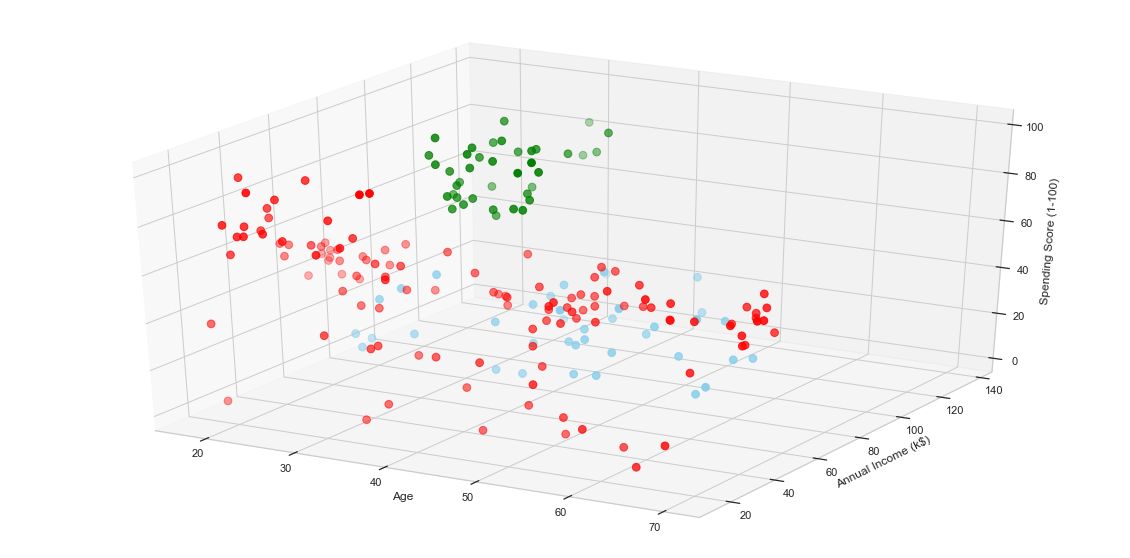

In [84]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111,projection='3d')

df0 = df_K[df_K.label==0]
df1 = df_K[df_K.label==1]
df2 = df_K[df_K.label==2]
ax.scatter(df0.Age, df0['Annual Income (k$)'], df0['Spending Score (1-100)'], c='skyblue', s=60)
ax.scatter(df1.Age, df1['Annual Income (k$)'], df1['Spending Score (1-100)'], c='red', s=60)
ax.scatter(df2.Age, df2['Annual Income (k$)'], df2['Spending Score (1-100)'], c='green', s=60)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [99]:
n_clusters = 3

In [112]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

In [114]:
df_spider.shape

(200, 4)

In [117]:
df_K.columns[:-1]

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'isMale'], dtype='object')

In [115]:
df_K.shape

(200, 5)

In [134]:
df_spider = pd.DataFrame(scaler.fit_transform(df_K.drop('label', axis=1)), columns = df_K.columns[:-1])
df_spider['label'] = df_K['label']
df_spider = df_spider.groupby('label').mean()

In [136]:
df_spider

,Age,Annual Income (k$),Spending Score (1-100),isMale
label,,,,
0,0.430668,0.590164,0.179914,0.526316
1,0.429331,0.238971,0.498258,0.406504
2,0.282544,0.586381,0.827839,0.461538


In [147]:
row

0

In [160]:
row

2

In [161]:
df_spider.iloc[0].values.flatten().tolist()

[0.43066801619433204,
 0.5901639344262296,
 0.17991407089151445,
 0.5263157894736842]

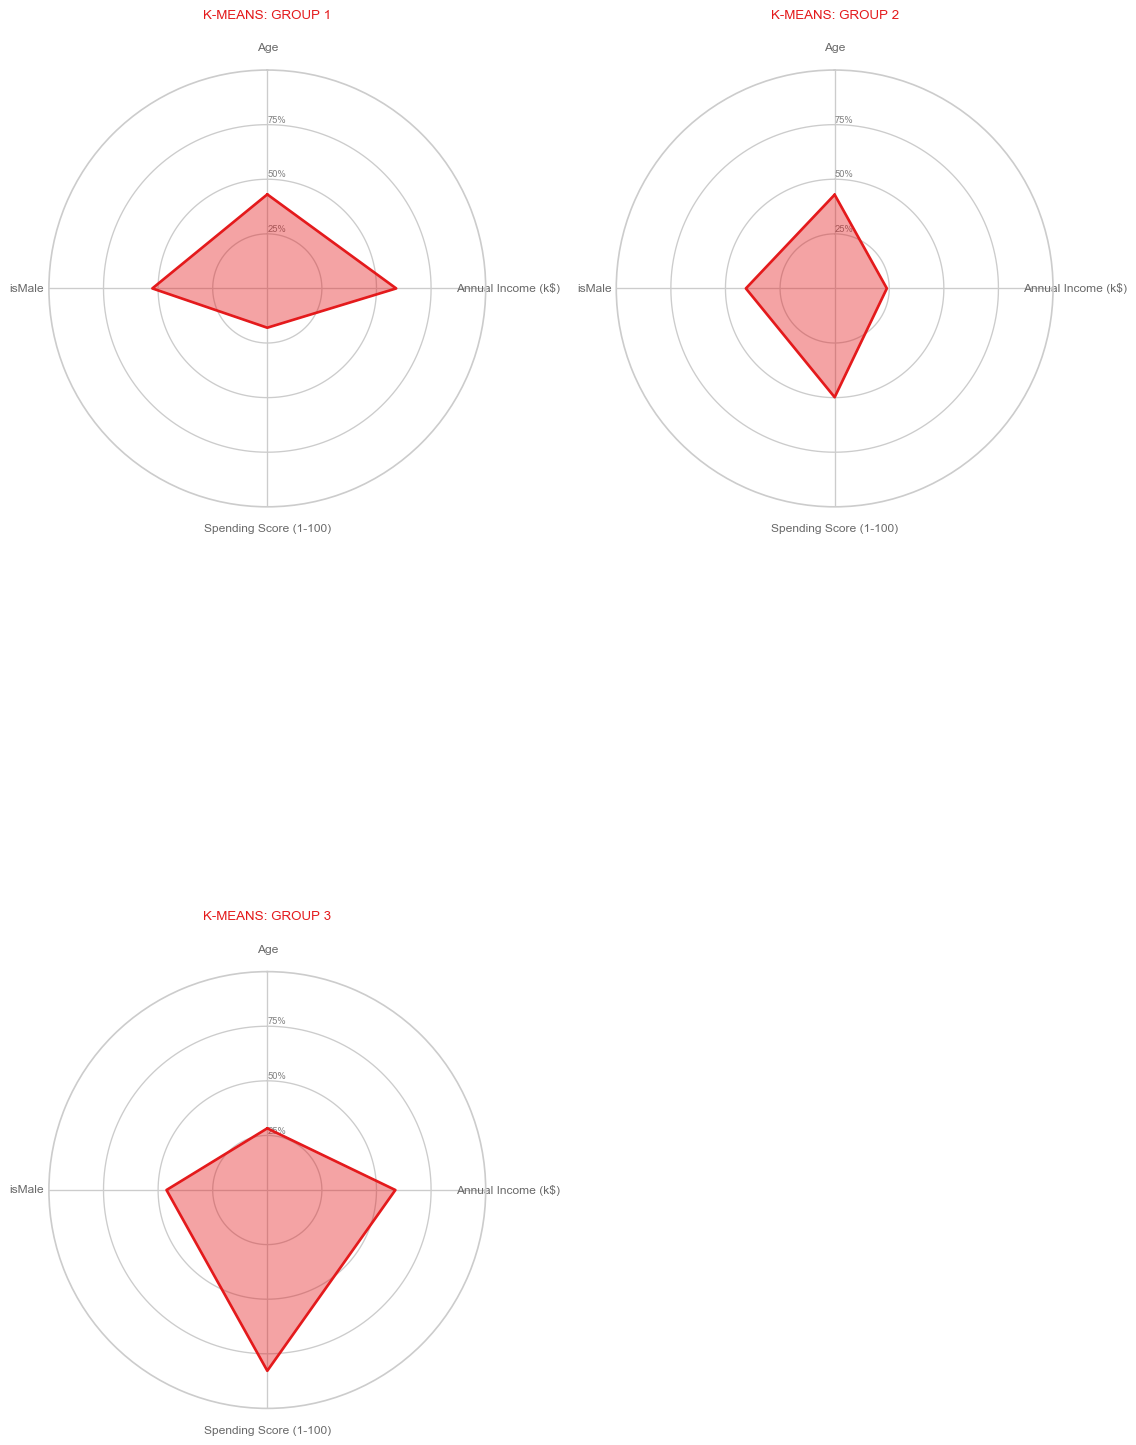

In [164]:
import math
def make_spider( row, title, color):

    categories=list(df_K)[:-1]
    N = len(categories)

    angles = [n / float(N) * 2 * math.pi for n in range(N)]
    angles += angles[:1]
    
    ax = plt.subplot(round(n_clusters/2), 2, row+1, polar=True)

    ax.set_theta_offset(math.pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], categories, color='dimgray', size=9)

    ax.set_rlabel_position(0)
    plt.yticks([0.25,0.5,0.75], ["25%","50%","75%"], color="grey", size=7)
    plt.ylim(0,1)

    values=df_spider.iloc[row].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    
    title = 'K-MEANS: GROUP ' + str(int(title)+1)
    plt.title(title, size=10, color=color, y=1.1)
#     plt.tight_layout()

my_dpi=96
plt.figure(figsize=(12, 20), dpi=my_dpi)

my_palette = plt.cm.get_cmap("Set1", len(df.index))

for row in range(3):
    make_spider(row=row, title=df_spider.index[row], color=my_palette(row))
plt.tight_layout()
